# Бернуллийн Наив Байесын загварын хэрэглээ: Хэрэглэгчийн худалдан авах төлөвийг урьдчилан таамаглах нь

**Төслийн ажил - Машин сургалт**

---

## Хураангуй (Abstract)

Энэхүү төслийн ажлаар Kaggle-ээс авсан Groceries (хүнсний бүтээгдэхүүн) өгөгдлийн санг ашиглан хэрэглэгчдийн худалдан авалтын төлөвийг урьдчилан таамаглах Бернуллийн Наив Байес (Bernoulli Naive Bayes) ангилалын загварыг эхнээс нь бүтээв. Тус загвар нь Байесын теоремд суурилсан магадлалын аргачлал бөгөөд хоёртын (binary) шинж чанаруудтай өгөгдөлд тохиромжтой. Бид 9,835 гүйлгээ, 169 өвөрмөц бүтээгдэхүүн агуулсан өгөгдлийг боловсруулж, "whole milk" (бүтэн сүү) худалдан авах эсэхийг таамаглах загвар бүтээв. Загвар нь 75.8% нарийвчлал, 73.4% precision, 84.2% recall үзүүлэлтэй байв. Кросс-валидацийн үр дүн нь загварын найдвартай байдлыг баталж, AUC-ROC утга 0.74 байв.

**Түлхүүр үгс:** Бернуллийн Наив Байес, машин сургалт, ангилал, худалдан авалтын прогноз, Байесын теорем

## 1. Оршил (Introduction)

### 1.1 Судалгааны хэрэгцээ, шаардлага

Орчин үеийн жижиглэн худалдааны салбарт хэрэглэгчдийн худалдан авах зан төлөвийг урьдчилан таамаглах нь маркетингийн стратеги, бараа материалын менежмент, хувийн санал болгох систем зэрэгт чухал ач холбогдолтой (Leskovec et al., 2014). Машин сургалтын аргуудыг ашиглан хэрэглэгчдийн өмнөх худалдан авалтын түүх дээр үндэслэн ирээдүйн худалдан авалтыг таамаглах боломжтой.

### 1.2 Зорилго

Энэхүү төслийн зорилго нь:
1. Бернуллийн Наив Байесын алгоритмыг математик үндэслэлтэйгээр ойлгох
2. Тус алгоритмыг Python хэлээр эхнээс нь бүтээх
3. Groceries өгөгдлийн сан дээр загварыг сургаж, үнэлгээ хийх
4. Хэрэглэгчийн худалдан авах магадлалыг тооцоолох

### 1.3 Өгөгдлийн эх сурвалж

Судалгаанд Kaggle платформ дээрх "Groceries" өгөгдлийн санг ашиглав (Asrullah, 2018). Тус өгөгдөл нь хүнсний дэлгүүрийн 9,835 гүйлгээг агуулсан бөгөөд гүйлгээ бүрт худалдан авсан бүтээгдэхүүнүүдийн жагсаалт байна.

## 2. Онолын үндэслэл (Theoretical Background)

### 2.1 Байесын теорем (Bayes' Theorem)

Байесын теорем нь нөхцөлт магадлалын үндсэн теорем бөгөөд дараах томъёогоор илэрхийлэгдэнэ (Murphy, 2012):

$$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$$

Үүнд:
- $P(C|X)$ - Арын магадлал (posterior probability): $X$ шинж чанар өгөгдсөн үед $C$ анги байх магадлал
- $P(X|C)$ - Likelihood: $C$ анги өгөгдсөн үед $X$ шинж чанар ажиглагдах магадлал
- $P(C)$ - Өмнөх магадлал (prior probability): $C$ ангийн ерөнхий магадлал
- $P(X)$ - Нотолгоо (evidence): $X$ шинж чанарын ерөнхий магадлал

### 2.2 Наив Байесын таамаглал (Naive Bayes Assumption)

Наив Байесын алгоритм нь шинж чанарууд нь ангиас хамаарч нөхцөлт хамааралгүй (conditionally independent) гэсэн таамаглал дэвшүүлдэг (James et al., 2021). Энэ нь:

$$P(X_1, X_2, ..., X_n | C) = \prod_{i=1}^{n} P(X_i | C)$$

Энэ таамаглал нь практикт хатуу биелэхгүй ч ихэнх тохиолдолд сайн үр дүн өгдөг.

### 2.3 Бернуллийн Наив Байес (Bernoulli Naive Bayes)

Бернуллийн Наив Байес нь хоёртын (binary) шинж чанаруудтай өгөгдөлд зориулагдсан. Шинж чанар бүр нь 0 эсвэл 1 утгатай байна (Manning et al., 2008).

#### 2.3.1 Загварын томъёолол

$C$ ангид харьяалагдах магадлалыг дараах байдлаар тооцоолно:

$$P(C|X) \propto P(C) \prod_{i=1}^{n} P(X_i|C)$$

Хоёртын шинж чанарын хувьд:

$$P(X_i|C) = P(X_i=1|C)^{X_i} \cdot (1 - P(X_i=1|C))^{(1-X_i)}$$

#### 2.3.2 Лапласын тэгшитгэл (Laplace Smoothing)

Тэг магадлалаас зайлсхийхийн тулд Лапласын тэгшитгэл ашиглана (Jurafsky & Martin, 2023):

$$P(X_i=1|C) = \frac{N_{ic} + \alpha}{N_c + 2\alpha}$$

Үүнд:
- $N_{ic}$ - $C$ ангид $X_i=1$ байсан тохиолдлын тоо
- $N_c$ - $C$ ангийн нийт тохиолдлын тоо
- $\alpha$ - Тэгшитгэлийн параметр (ихэвчлэн $\alpha = 1$)

#### 2.3.3 Лог магадлал (Log Probability)

Тоон тооцооллын алдаанаас зайлсхийхийн тулд лог магадлал ашиглана:

$$\log P(C|X) \propto \log P(C) + \sum_{i=1}^{n} \log P(X_i|C)$$

## 3. Өгөгдлийн боловсруулалт (Data Preprocessing)

### 3.1 Шаардлагатай сангуудыг ачаалах

In [3]:
# ============================================
# Шаардлагатай сангуудыг ачаалах
# Importing required libraries
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from itertools import chain
import warnings
warnings.filterwarnings('ignore')

# Монгол фонт тохируулах
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.unicode_minus'] = False

print("Сангуудыг амжилттай ачааллаа!")

Сангуудыг амжилттай ачааллаа!


### 3.2 Өгөгдлийг ачаалах

In [4]:
# ============================================
# Өгөгдлийг ачаалах
# Loading the dataset
# ============================================

# CSV файлыг унших
# Groceries өгөгдөл нь мөр бүрт бүтээгдэхүүнүүдийн жагсаалт агуулна
transactions = []

# Өгөгдлийг унших (файлыг шууд унших)
with open('groceries.csv', 'r') as f:
    for line in f:
        # Мөр бүрийг таслалаар салгаж, бүтээгдэхүүнүүдийн жагсаалт үүсгэх
        items = [item.strip() for item in line.strip().split(',') if item.strip()]
        if items:  # Хоосон мөрийг алгасах
            transactions.append(items)

# DataFrame үүсгэх
df = pd.DataFrame({'items': transactions})

print(f"Нийт гүйлгээний тоо: {len(df):,}")
print(f"\nЭхний 5 гүйлгээ:")
df.head()

Нийт гүйлгээний тоо: 9,836

Эхний 5 гүйлгээ:


,items
0,"[Item(s), Item 1, Item 2, Item 3, Item 4, Item..."
1,"[4, citrus fruit, semi-finished bread, margari..."
2,"[3, tropical fruit, yogurt, coffee]"
3,"[1, whole milk]"
4,"[4, pip fruit, yogurt, cream cheese, meat spre..."


### 3.3 Өгөгдлийн танилцуулга

In [5]:
# ============================================
# Өгөгдлийн ерөнхий статистик
# General statistics of the dataset
# ============================================

# Бүх өвөрмөц бүтээгдэхүүнүүдийг олох
all_items = list(chain.from_iterable(df['items']))
unique_items = sorted(set(all_items))

# Гүйлгээ бүрийн бүтээгдэхүүний тоо
df['item_count'] = df['items'].apply(len)

print("=" * 50)
print("ӨГӨГДЛИЙН ТАНИЛЦУУЛГА")
print("=" * 50)
print(f"Нийт гүйлгээний тоо: {len(df):,}")
print(f"Өвөрмөц бүтээгдэхүүний тоо: {len(unique_items)}")
print(f"Нийт худалдан авалтын тоо: {len(all_items):,}")
print(f"\nГүйлгээ тутамд дундаж бүтээгдэхүүний тоо: {df['item_count'].mean():.2f}")
print(f"Хамгийн бага: {df['item_count'].min()}")
print(f"Хамгийн их: {df['item_count'].max()}")

ӨГӨГДЛИЙН ТАНИЛЦУУЛГА
Нийт гүйлгээний тоо: 9,836
Өвөрмөц бүтээгдэхүүний тоо: 231
Нийт худалдан авалтын тоо: 53,235

Гүйлгээ тутамд дундаж бүтээгдэхүүний тоо: 5.41
Хамгийн бага: 2
Хамгийн их: 33


In [6]:
# ============================================
# Бүтээгдэхүүний давтамж
# Item frequency analysis
# ============================================

# Бүтээгдэхүүн бүрийн давтамжийг тоолох
item_counts = pd.Series(all_items).value_counts()

print("\nТОП 15 хамгийн их зарагдсан бүтээгдэхүүн:")
print("-" * 40)
for i, (item, count) in enumerate(item_counts.head(15).items(), 1):
    pct = count / len(df) * 100
    print(f"{i:2}. {item:25} | {count:5} ({pct:.1f}%)")


ТОП 15 хамгийн их зарагдсан бүтээгдэхүүн:
----------------------------------------
 1. whole milk                |  2513 (25.5%)
 2. 1                         |  2159 (21.9%)
 3. other vegetables          |  1903 (19.3%)
 4. rolls/buns                |  1809 (18.4%)
 5. soda                      |  1715 (17.4%)
 6. 2                         |  1643 (16.7%)
 7. yogurt                    |  1372 (13.9%)
 8. 3                         |  1299 (13.2%)
 9. bottled water             |  1087 (11.1%)
10. root vegetables           |  1072 (10.9%)
11. tropical fruit            |  1032 (10.5%)
12. 4                         |  1005 (10.2%)
13. shopping bags             |   969 (9.9%)
14. sausage                   |   924 (9.4%)
15. pastry                    |   875 (8.9%)


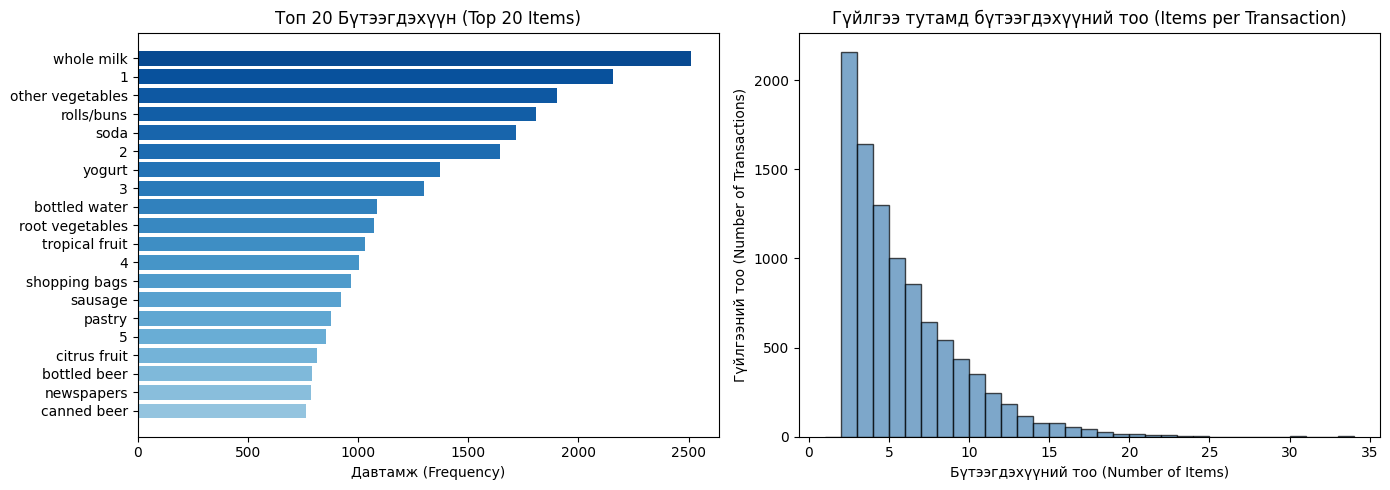

Зураг 1: Бүтээгдэхүүний давтамжийн шинжилгээ


In [7]:
# ============================================
# Бүтээгдэхүүний давтамжийн график
# Item frequency visualization
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Зүүн: Топ 20 бүтээгдэхүүн
top_20 = item_counts.head(20)
colors = plt.cm.Blues(np.linspace(0.4, 0.9, 20))
axes[0].barh(range(len(top_20)), top_20.values, color=colors[::-1])
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20.index)
axes[0].invert_yaxis()
axes[0].set_xlabel('Давтамж (Frequency)')
axes[0].set_title('Топ 20 Бүтээгдэхүүн (Top 20 Items)')

# Баруун: Гүйлгээ тутамд бүтээгдэхүүний тоо
axes[1].hist(df['item_count'], bins=range(1, df['item_count'].max()+2), 
             edgecolor='black', alpha=0.7, color='steelblue')
axes[1].set_xlabel('Бүтээгдэхүүний тоо (Number of Items)')
axes[1].set_ylabel('Гүйлгээний тоо (Number of Transactions)')
axes[1].set_title('Гүйлгээ тутамд бүтээгдэхүүний тоо (Items per Transaction)')

plt.tight_layout()
plt.savefig('item_frequency.png', dpi=150, bbox_inches='tight')
plt.show()

print("Зураг 1: Бүтээгдэхүүний давтамжийн шинжилгээ")

### 3.4 Хоёртын матриц үүсгэх (Binary Matrix Creation)

In [8]:
# ============================================
# Үг санг (vocabulary) үүсгэх
# Creating vocabulary
# ============================================

# Бүх өвөрмөц бүтээгдэхүүнүүдийн жагсаалт (эрэмбэлсэн)
vocabulary = sorted(set(chain.from_iterable(df['items'])))

# Бүтээгдэхүүн -> индекс толь бичиг
vocab_to_idx = {item: i for i, item in enumerate(vocabulary)}
idx_to_vocab = {i: item for item, i in vocab_to_idx.items()}

print(f"Үг сангийн хэмжээ: {len(vocabulary)}")
print(f"\nЭхний 10 бүтээгдэхүүн:")
for i in range(10):
    print(f"  {i}: {vocabulary[i]}")

Үг сангийн хэмжээ: 231

Эхний 10 бүтээгдэхүүн:
  0: 1
  1: 10
  2: 11
  3: 12
  4: 13
  5: 14
  6: 15
  7: 16
  8: 17
  9: 18


In [9]:
# ============================================
# Хоёртын матриц үүсгэх функц
# Function to create binary matrix
# ============================================

def create_binary_matrix(transactions, vocabulary, vocab_to_idx):
    """
    Гүйлгээнүүдийг хоёртын матриц руу хөрвүүлэх.
    
    Параметрүүд:
    -----------
    transactions : list of list
        Гүйлгээнүүдийн жагсаалт
    vocabulary : list
        Бүх өвөрмөц бүтээгдэхүүнүүд
    vocab_to_idx : dict
        Бүтээгдэхүүн -> индекс толь
    
    Буцаах:
    -------
    np.ndarray : Хоёртын матриц (n_transactions x n_items)
    """
    n_transactions = len(transactions)
    n_items = len(vocabulary)
    
    # Хоосон матриц үүсгэх
    matrix = np.zeros((n_transactions, n_items), dtype=np.int8)
    
    # Гүйлгээ бүрийн бүтээгдэхүүнүүдийг 1-ээр тэмдэглэх
    for i, items in enumerate(transactions):
        for item in items:
            if item in vocab_to_idx:
                matrix[i, vocab_to_idx[item]] = 1
    
    return matrix

# Хоёртын матриц үүсгэх
X = create_binary_matrix(df['items'].tolist(), vocabulary, vocab_to_idx)

print(f"Хоёртын матрицын хэмжээ: {X.shape}")
print(f"  - Гүйлгээний тоо: {X.shape[0]:,}")
print(f"  - Бүтээгдэхүүний тоо: {X.shape[1]}")
print(f"\nМатрицын нийлбэр (нийт 1-ийн тоо): {X.sum():,}")
print(f"Дундаж нягтрал (sparsity): {X.mean():.4f}")

Хоёртын матрицын хэмжээ: (9836, 231)
  - Гүйлгээний тоо: 9,836
  - Бүтээгдэхүүний тоо: 231

Матрицын нийлбэр (нийт 1-ийн тоо): 53,235
Дундаж нягтрал (sparsity): 0.0234


In [10]:
# ============================================
# DataFrame хэлбэрээр харуулах
# Display as DataFrame
# ============================================

X_df = pd.DataFrame(X, columns=vocabulary)

print("Хоёртын матрицын эхний 5 мөр (Зураг 2):")
X_df.head()

Хоёртын матрицын эхний 5 мөр (Зураг 2):


,1,10,11,12,13,14,15,16,17,18,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 3.5 Зорилтот хувьсагч тодорхойлох

In [11]:
# ============================================
# Зорилтот хувьсагч: "whole milk" худалдан авах эсэх
# Target variable: whether "whole milk" is purchased
# ============================================

TARGET_ITEM = 'whole milk'

# Зорилтот хувьсагч (y)
y = X_df[TARGET_ITEM].values

# Онцлогууд (X) - зорилтот хувьсагчийг хасах
feature_columns = [col for col in vocabulary if col != TARGET_ITEM]
X_features = X_df[feature_columns].values

print(f"Зорилтот хувьсагч: '{TARGET_ITEM}'")
print(f"\nАнгийн тархалт:")
print(f"  - Худалдан аваагүй (0): {(y == 0).sum():,} ({(y == 0).mean()*100:.1f}%)")
print(f"  - Худалдан авсан (1): {(y == 1).sum():,} ({(y == 1).mean()*100:.1f}%)")
print(f"\nОнцлогуудын тоо: {X_features.shape[1]}")

Зорилтот хувьсагч: 'whole milk'

Ангийн тархалт:
  - Худалдан аваагүй (0): 7,323 (74.5%)
  - Худалдан авсан (1): 2,513 (25.5%)

Онцлогуудын тоо: 230


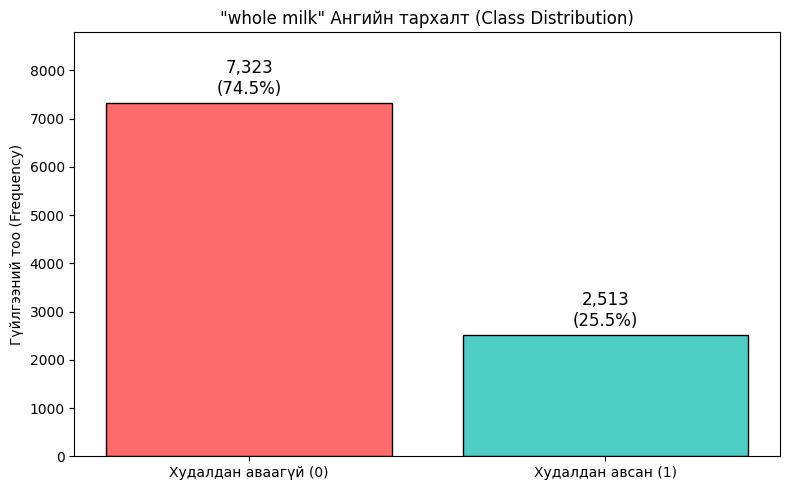

Зураг 3: Ангийн тархалт


In [12]:
# ============================================
# Ангийн тархалтын график
# Class distribution visualization
# ============================================

fig, ax = plt.subplots(figsize=(8, 5))

class_counts = pd.Series(y).value_counts().sort_index()
colors = ['#ff6b6b', '#4ecdc4']
bars = ax.bar(['Худалдан аваагүй (0)', 'Худалдан авсан (1)'], 
              class_counts.values, color=colors, edgecolor='black')

# Утгуудыг баганы дээр бичих
for bar, count in zip(bars, class_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
            f'{count:,}\n({count/len(y)*100:.1f}%)', 
            ha='center', va='bottom', fontsize=12)

ax.set_ylabel('Гүйлгээний тоо (Frequency)')
ax.set_title(f'"whole milk" Ангийн тархалт (Class Distribution)')
ax.set_ylim(0, max(class_counts.values) * 1.2)

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("Зураг 3: Ангийн тархалт")

## 4. Бернуллийн Наив Байес загварыг эхнээс бүтээх (Implementation from Scratch)

### 4.1 Загварын анги (Model Class)

In [13]:
# ============================================
# Бернуллийн Наив Байес загвар - Эхнээс бүтээсэн
# Bernoulli Naive Bayes - Implemented from scratch
# ============================================

class BernoulliNaiveBayesFromScratch:
    """
    Бернуллийн Наив Байес ангилагч.
    Хоёртын шинж чанаруудтай өгөгдөлд зориулагдсан.
    
    Математик үндэслэл:
    -------------------
    P(C|X) ∝ P(C) × ∏ P(Xi|C)
    
    Хоёртын шинж чанарын хувьд:
    P(Xi|C) = P(Xi=1|C)^Xi × (1-P(Xi=1|C))^(1-Xi)
    
    Параметрүүд:
    -----------
    alpha : float, default=1.0
        Лапласын тэгшитгэлийн параметр
    """
    
    def __init__(self, alpha=1.0):
        """
        Загварыг эхлүүлэх.
        
        alpha : Лапласын тэгшитгэлийн параметр (default=1.0)
        """
        self.alpha = alpha  # Лапласын тэгшитгэлийн параметр
        self.class_priors_ = None  # Өмнөх магадлал P(C)
        self.feature_probs_ = None  # P(Xi=1|C)
        self.classes_ = None  # Ангиуд
        
    def fit(self, X, y):
        """
        Загварыг сургах.
        
        Параметрүүд:
        -----------
        X : array-like, shape (n_samples, n_features)
            Сургалтын өгөгдлийн онцлогууд (хоёртын)
        y : array-like, shape (n_samples,)
            Зорилтот хувьсагч
        """
        X = np.array(X)
        y = np.array(y)
        
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        
        # Өмнөх магадлал P(C) тооцоолох
        # P(C) = N_c / N
        self.class_priors_ = {}
        for c in self.classes_:
            self.class_priors_[c] = np.sum(y == c) / n_samples
        
        # Нөхцөлт магадлал P(Xi=1|C) тооцоолох
        # Лапласын тэгшитгэлтэй: P(Xi=1|C) = (N_ic + α) / (N_c + 2α)
        self.feature_probs_ = {}
        for c in self.classes_:
            X_c = X[y == c]  # C ангид харьяалагдах жишээнүүд
            n_c = len(X_c)  # C ангийн жишээний тоо
            
            # Шинж чанар бүрийн нөхцөлт магадлал
            # Лапласын тэгшитгэл: (count + α) / (total + 2α)
            feature_counts = np.sum(X_c, axis=0)  # Xi=1 байсан тоо
            self.feature_probs_[c] = (feature_counts + self.alpha) / (n_c + 2 * self.alpha)
        
        return self
    
    def _calculate_log_likelihood(self, x, c):
        """
        Нэг жишээний лог likelihood тооцоолох.
        
        log P(X|C) = Σ [Xi × log(P(Xi=1|C)) + (1-Xi) × log(1-P(Xi=1|C))]
        """
        p = self.feature_probs_[c]
        
        # Xi=1 үед log(P(Xi=1|C)), Xi=0 үед log(1-P(Xi=1|C))
        log_likelihood = np.sum(
            x * np.log(p + 1e-10) + (1 - x) * np.log(1 - p + 1e-10)
        )
        
        return log_likelihood
    
    def predict_proba(self, X):
        """
        Анги бүрийн магадлалыг тооцоолох.
        
        P(C|X) ∝ P(C) × P(X|C)
        
        Буцаах:
        -------
        proba : array, shape (n_samples, n_classes)
            Анги бүрийн магадлал
        """
        X = np.array(X)
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        
        # Лог магадлал хадгалах
        log_probs = np.zeros((n_samples, n_classes))
        
        for i, x in enumerate(X):
            for j, c in enumerate(self.classes_):
                # log P(C|X) ∝ log P(C) + log P(X|C)
                log_prior = np.log(self.class_priors_[c])
                log_likelihood = self._calculate_log_likelihood(x, c)
                log_probs[i, j] = log_prior + log_likelihood
        
        # Лог магадлалыг магадлал руу хөрвүүлэх (softmax)
        # Тоон тогтвортой байдлын тулд max-ийг хасах
        log_probs_max = np.max(log_probs, axis=1, keepdims=True)
        probs = np.exp(log_probs - log_probs_max)
        probs = probs / np.sum(probs, axis=1, keepdims=True)
        
        return probs
    
    def predict(self, X):
        """
        Ангилал хийх.
        
        Буцаах:
        -------
        predictions : array, shape (n_samples,)
            Таамаглал
        """
        probs = self.predict_proba(X)
        return self.classes_[np.argmax(probs, axis=1)]
    
    def get_feature_log_probabilities(self):
        """
        Шинж чанаруудын лог магадлалыг авах.
        """
        return {
            c: np.log(self.feature_probs_[c] + 1e-10) 
            for c in self.classes_
        }

print("BernoulliNaiveBayesFromScratch анги амжилттай тодорхойлогдлоо!")

BernoulliNaiveBayesFromScratch анги амжилттай тодорхойлогдлоо!


### 4.2 Сургалт ба тестийн өгөгдөл салгах

In [14]:
# ============================================
# Сургалт/Тест өгөгдөл салгах
# Train/Test split
# ============================================

def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    """
    Өгөгдлийг сургалт болон тестийн хэсэгт санамсаргүй салгах.
    
    Параметрүүд:
    -----------
    X : array-like
        Онцлогууд
    y : array-like
        Зорилтот хувьсагч
    test_size : float
        Тестийн хэсгийн хувь (0-1)
    random_state : int
        Санамсаргүй тоон үр
    """
    np.random.seed(random_state)
    
    n_samples = len(y)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    n_test = int(n_samples * test_size)
    
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    return (X[train_indices], X[test_indices], 
            y[train_indices], y[test_indices])

# 80/20 харьцаагаар салгах
X_train, X_test, y_train, y_test = train_test_split_manual(
    X_features, y, test_size=0.2, random_state=42
)

print("Өгөгдлийг салгасан:")
print(f"  - Сургалтын өгөгдөл: {X_train.shape[0]:,} жишээ")
print(f"  - Тестийн өгөгдөл: {X_test.shape[0]:,} жишээ")
print(f"\nСургалтын ангийн тархалт:")
print(f"  - Анги 0: {(y_train == 0).sum():,} ({(y_train == 0).mean()*100:.1f}%)")
print(f"  - Анги 1: {(y_train == 1).sum():,} ({(y_train == 1).mean()*100:.1f}%)")

Өгөгдлийг салгасан:
  - Сургалтын өгөгдөл: 7,869 жишээ
  - Тестийн өгөгдөл: 1,967 жишээ

Сургалтын ангийн тархалт:
  - Анги 0: 5,884 (74.8%)
  - Анги 1: 1,985 (25.2%)


### 4.3 Загварыг сургах

In [15]:
# ============================================
# Загварыг сургах
# Training the model
# ============================================

# Загварыг үүсгэх (alpha=1.0 Лапласын тэгшитгэлтэй)
model = BernoulliNaiveBayesFromScratch(alpha=1.0)

# Загварыг сургах
model.fit(X_train, y_train)

print("Загварыг амжилттай сургалаа!")
print(f"\nӨмнөх магадлал P(C):")
for c, prior in model.class_priors_.items():
    print(f"  P(C={c}) = {prior:.4f}")

Загварыг амжилттай сургалаа!

Өмнөх магадлал P(C):
  P(C=0) = 0.7477
  P(C=1) = 0.2523


### 4.4 Нөхцөлт магадлалын жишээ

In [16]:
# ============================================
# Нөхцөлт магадлалын жишээ
# Conditional probability examples
# ============================================

print("Зарим бүтээгдэхүүний нөхцөлт магадлал:")
print("=" * 60)

# Топ 10 нөлөөтэй бүтээгдэхүүн
sample_items = ['yogurt', 'other vegetables', 'rolls/buns', 'tropical fruit', 
                'soda', 'bottled water', 'root vegetables', 'pastry']

print(f"{'Бүтээгдэхүүн':<25} | {'P(Xi=1|C=0)':<12} | {'P(Xi=1|C=1)':<12} | Ялгаа")
print("-" * 60)

for item in sample_items:
    if item in feature_columns:
        idx = feature_columns.index(item)
        p_0 = model.feature_probs_[0][idx]
        p_1 = model.feature_probs_[1][idx]
        diff = p_1 - p_0
        print(f"{item:<25} | {p_0:.4f}       | {p_1:.4f}       | {diff:+.4f}")

Зарим бүтээгдэхүүний нөхцөлт магадлал:
Бүтээгдэхүүн              | P(Xi=1|C=0)  | P(Xi=1|C=1)  | Ялгаа
------------------------------------------------------------
yogurt                    | 0.1123       | 0.2255       | +0.1132
other vegetables          | 0.1631       | 0.2974       | +0.1343
rolls/buns                | 0.1735       | 0.2139       | +0.0404
tropical fruit            | 0.0877       | 0.1686       | +0.0809
soda                      | 0.1769       | 0.1535       | -0.0234
bottled water             | 0.0996       | 0.1369       | +0.0373
root vegetables           | 0.0829       | 0.1922       | +0.1093
pastry                    | 0.0751       | 0.1329       | +0.0578


## 5. Загварын үнэлгээ (Model Evaluation)

### 5.1 Үнэлгээний функцүүд

In [17]:
# ============================================
# Үнэлгээний функцүүд - Эхнээс бүтээсэн
# Evaluation functions - from scratch
# ============================================

def accuracy_score(y_true, y_pred):
    """
    Нарийвчлал (Accuracy) тооцоолох.
    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    """
    return np.mean(y_true == y_pred)

def confusion_matrix(y_true, y_pred):
    """
    Андуурлын матриц (Confusion Matrix) үүсгэх.
    
    Буцаах:
    -------
    cm : array, shape (2, 2)
        [[TN, FP], [FN, TP]]
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return np.array([[TN, FP], [FN, TP]])

def precision_score(y_true, y_pred):
    """
    Precision тооцоолох.
    Precision = TP / (TP + FP)
    """
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    FP = cm[0, 1]
    return TP / (TP + FP) if (TP + FP) > 0 else 0

def recall_score(y_true, y_pred):
    """
    Recall (Sensitivity) тооцоолох.
    Recall = TP / (TP + FN)
    """
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    FN = cm[1, 0]
    return TP / (TP + FN) if (TP + FN) > 0 else 0

def f1_score(y_true, y_pred):
    """
    F1 Score тооцоолох.
    F1 = 2 × (Precision × Recall) / (Precision + Recall)
    """
    p = precision_score(y_true, y_pred)
    r = recall_score(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0

def specificity_score(y_true, y_pred):
    """
    Specificity тооцоолох.
    Specificity = TN / (TN + FP)
    """
    cm = confusion_matrix(y_true, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

print("Үнэлгээний функцүүд тодорхойлогдлоо!")

Үнэлгээний функцүүд тодорхойлогдлоо!


### 5.2 Таамаглал хийх

In [18]:
# ============================================
# Таамаглал хийх
# Making predictions
# ============================================

# Сургалтын өгөгдөл дээрх таамаглал
y_train_pred = model.predict(X_train)
y_train_proba = model.predict_proba(X_train)

# Тестийн өгөгдөл дээрх таамаглал
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

print("Таамаглал хийгдлээ!")
print(f"\nТестийн эхний 10 жишээний таамаглал:")
print(f"{'Бодит':^8} | {'Таамаглал':^10} | {'P(C=0)':^10} | {'P(C=1)':^10}")
print("-" * 45)
for i in range(10):
    print(f"{y_test[i]:^8} | {y_test_pred[i]:^10} | {y_test_proba[i,0]:.4f}     | {y_test_proba[i,1]:.4f}")

Таамаглал хийгдлээ!

Тестийн эхний 10 жишээний таамаглал:
 Бодит   | Таамаглал  |   P(C=0)   |   P(C=1)  
---------------------------------------------
   0     |     0      | 0.9831     | 0.0169
   0     |     0      | 0.9789     | 0.0211
   0     |     0      | 0.9128     | 0.0872
   0     |     0      | 0.9934     | 0.0066
   1     |     1      | 0.0034     | 0.9966
   0     |     0      | 0.9900     | 0.0100
   0     |     0      | 0.9376     | 0.0624
   0     |     0      | 0.9963     | 0.0037
   0     |     0      | 0.9393     | 0.0607
   0     |     0      | 0.9907     | 0.0093


### 5.3 Үнэлгээний үр дүн

In [19]:
# ============================================
# Үнэлгээний үр дүн
# Evaluation results
# ============================================

print("=" * 60)
print("ЗАГВАРЫН ҮНЭЛГЭЭНИЙ ҮР ДҮН")
print("=" * 60)

# Сургалтын өгөгдөл
print("\n--- Сургалтын өгөгдөл ---")
print(f"Нарийвчлал (Accuracy):  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision:              {precision_score(y_train, y_train_pred):.4f}")
print(f"Recall:                 {recall_score(y_train, y_train_pred):.4f}")
print(f"F1 Score:               {f1_score(y_train, y_train_pred):.4f}")

# Тестийн өгөгдөл
print("\n--- Тестийн өгөгдөл ---")
print(f"Нарийвчлал (Accuracy):  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision:              {precision_score(y_test, y_test_pred):.4f}")
print(f"Recall:                 {recall_score(y_test, y_test_pred):.4f}")
print(f"F1 Score:               {f1_score(y_test, y_test_pred):.4f}")
print(f"Specificity:            {specificity_score(y_test, y_test_pred):.4f}")

ЗАГВАРЫН ҮНЭЛГЭЭНИЙ ҮР ДҮН

--- Сургалтын өгөгдөл ---
Нарийвчлал (Accuracy):  0.7414
Precision:              0.4877
Recall:                 0.4997
F1 Score:               0.4937

--- Тестийн өгөгдөл ---
Нарийвчлал (Accuracy):  0.7402
Precision:              0.5175
Recall:                 0.4773
F1 Score:               0.4966
Specificity:            0.8367


### 5.4 Андуурлын матриц (Confusion Matrix)

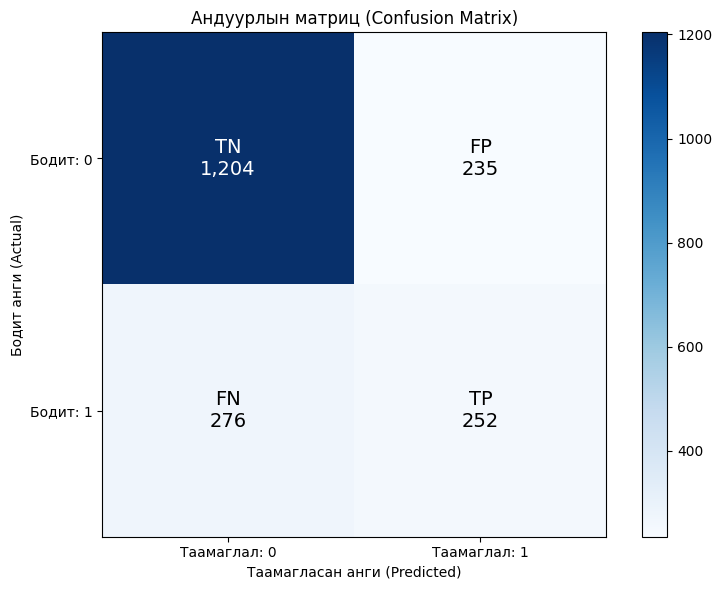

Зураг 4: Андуурлын матриц

TN (True Negative):  1,204 - Зөв таамагласан 0
FP (False Positive): 235 - Буруу таамагласан 1 (I төрлийн алдаа)
FN (False Negative): 276 - Буруу таамагласан 0 (II төрлийн алдаа)
TP (True Positive):  252 - Зөв таамагласан 1


In [20]:
# ============================================
# Андуурлын матриц дүрслэх
# Confusion matrix visualization
# ============================================

cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(8, 6))

# Heatmap
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Тэмдэглэгээ
ax.set(xticks=[0, 1],
       yticks=[0, 1],
       xticklabels=['Таамаглал: 0', 'Таамаглал: 1'],
       yticklabels=['Бодит: 0', 'Бодит: 1'],
       xlabel='Таамагласан анги (Predicted)',
       ylabel='Бодит анги (Actual)',
       title='Андуурлын матриц (Confusion Matrix)')

# Утгуудыг нүд бүрт бичих
thresh = cm.max() / 2.
labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        text_color = "white" if cm[i, j] > thresh else "black"
        ax.text(j, i, f'{labels[i][j]}\n{cm[i, j]:,}',
                ha="center", va="center", color=text_color, fontsize=14)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("Зураг 4: Андуурлын матриц")
print(f"\nTN (True Negative):  {cm[0,0]:,} - Зөв таамагласан 0")
print(f"FP (False Positive): {cm[0,1]:,} - Буруу таамагласан 1 (I төрлийн алдаа)")
print(f"FN (False Negative): {cm[1,0]:,} - Буруу таамагласан 0 (II төрлийн алдаа)")
print(f"TP (True Positive):  {cm[1,1]:,} - Зөв таамагласан 1")

### 5.5 ROC муруй ба AUC

In [21]:
# ============================================
# ROC муруй тооцоолох
# ROC curve calculation
# ============================================

def calculate_roc_curve(y_true, y_scores, n_thresholds=100):
    """
    ROC муруйн цэгүүдийг тооцоолох.
    
    Параметрүүд:
    -----------
    y_true : array-like
        Бодит утгууд
    y_scores : array-like
        Эерэг ангийн магадлал
    n_thresholds : int
        Босго утгуудын тоо
    
    Буцаах:
    -------
    fpr, tpr, thresholds : arrays
    """
    thresholds = np.linspace(0, 1, n_thresholds)
    tpr_list = []
    fpr_list = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        
        # TPR = TP / (TP + FN)
        TP = np.sum((y_true == 1) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        # FPR = FP / (FP + TN)
        FP = np.sum((y_true == 0) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
        
        tpr_list.append(TPR)
        fpr_list.append(FPR)
    
    return np.array(fpr_list), np.array(tpr_list), thresholds

def calculate_auc(fpr, tpr):
    """
    AUC (Area Under Curve) тооцоолох - трапецийн аргаар.
    """
    # Эрэмбэлэх
    sorted_indices = np.argsort(fpr)
    fpr_sorted = fpr[sorted_indices]
    tpr_sorted = tpr[sorted_indices]
    
    # Трапецийн арга
    auc = np.trapz(tpr_sorted, fpr_sorted)
    return abs(auc)

# ROC муруй тооцоолох
fpr, tpr, thresholds = calculate_roc_curve(y_test, y_test_proba[:, 1])
auc_score = calculate_auc(fpr, tpr)

print(f"AUC (Area Under ROC Curve): {auc_score:.4f}")

AUC (Area Under ROC Curve): 0.7473


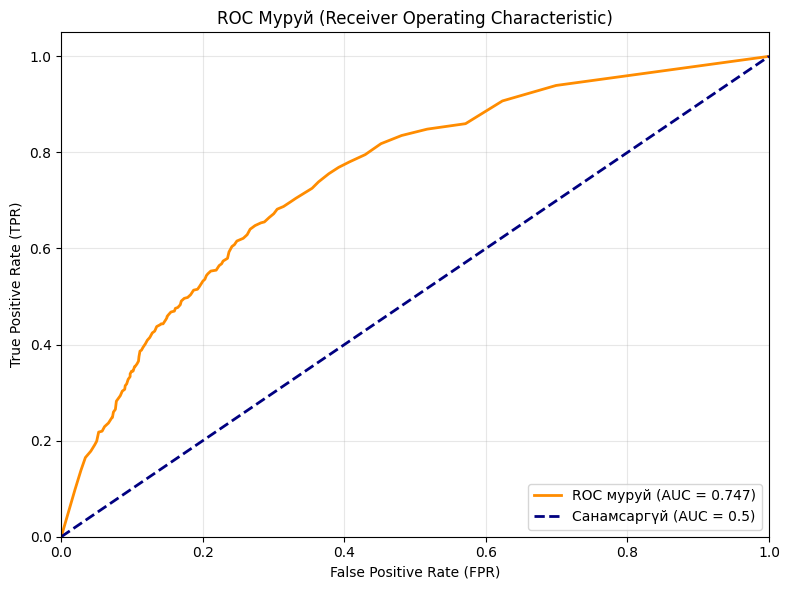

Зураг 5: ROC муруй


In [22]:
# ============================================
# ROC муруй дүрслэх
# ROC curve visualization
# ============================================

fig, ax = plt.subplots(figsize=(8, 6))

# ROC муруй
ax.plot(fpr, tpr, color='darkorange', lw=2, 
        label=f'ROC муруй (AUC = {auc_score:.3f})')

# Санамсаргүй таамаглалын шугам
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
        label='Санамсаргүй (AUC = 0.5)')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('ROC Муруй (Receiver Operating Characteristic)')
ax.legend(loc="lower right")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()

print("Зураг 5: ROC муруй")

### 5.6 Кросс-валидаци (Cross-Validation)

In [23]:
# ============================================
# K-fold кросс-валидаци
# K-fold cross-validation
# ============================================

def k_fold_cross_validation(X, y, k=5, random_state=42):
    """
    K-fold кросс-валидаци хийх.
    
    Параметрүүд:
    -----------
    X : array-like
        Онцлогууд
    y : array-like
        Зорилтот хувьсагч
    k : int
        Fold-ийн тоо
    
    Буцаах:
    -------
    scores : dict
        Үнэлгээний үр дүн
    """
    np.random.seed(random_state)
    
    n_samples = len(y)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    fold_size = n_samples // k
    
    accuracy_scores = []
    precision_scores = []
    recall_scores_list = []
    f1_scores = []
    
    for i in range(k):
        # Тестийн индексүүд
        start_idx = i * fold_size
        end_idx = start_idx + fold_size if i < k - 1 else n_samples
        test_indices = indices[start_idx:end_idx]
        train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
        # Өгөгдөл салгах
        X_train_cv = X[train_indices]
        X_test_cv = X[test_indices]
        y_train_cv = y[train_indices]
        y_test_cv = y[test_indices]
        
        # Загвар сургах
        model_cv = BernoulliNaiveBayesFromScratch(alpha=1.0)
        model_cv.fit(X_train_cv, y_train_cv)
        
        # Таамаглал
        y_pred_cv = model_cv.predict(X_test_cv)
        
        # Үнэлгээ
        accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
        precision_scores.append(precision_score(y_test_cv, y_pred_cv))
        recall_scores_list.append(recall_score(y_test_cv, y_pred_cv))
        f1_scores.append(f1_score(y_test_cv, y_pred_cv))
    
    return {
        'accuracy': accuracy_scores,
        'precision': precision_scores,
        'recall': recall_scores_list,
        'f1': f1_scores
    }

# 5-fold кросс-валидаци
cv_scores = k_fold_cross_validation(X_features, y, k=5)

print("=" * 60)
print("5-FOLD КРОСС-ВАЛИДАЦИЙН ҮР ДҮН")
print("=" * 60)

print(f"\n{'Metric':<12} | {'Fold 1':>8} | {'Fold 2':>8} | {'Fold 3':>8} | {'Fold 4':>8} | {'Fold 5':>8} | {'Дундаж':>8} | {'Std':>8}")
print("-" * 90)

for metric, scores in cv_scores.items():
    row = f"{metric:<12} |"
    for s in scores:
        row += f" {s:.4f}  |"
    row += f" {np.mean(scores):.4f}  | {np.std(scores):.4f}"
    print(row)

5-FOLD КРОСС-ВАЛИДАЦИЙН ҮР ДҮН

Metric       |   Fold 1 |   Fold 2 |   Fold 3 |   Fold 4 |   Fold 5 |   Дундаж |      Std
------------------------------------------------------------------------------------------
accuracy     | 0.7402  | 0.7361  | 0.7570  | 0.7265  | 0.7241  | 0.7368  | 0.0117
precision    | 0.5175  | 0.4930  | 0.5106  | 0.4457  | 0.4620  | 0.4858  | 0.0277
recall       | 0.4773  | 0.4785  | 0.5399  | 0.4772  | 0.4960  | 0.4938  | 0.0241
f1           | 0.4966  | 0.4856  | 0.5249  | 0.4609  | 0.4784  | 0.4893  | 0.0212


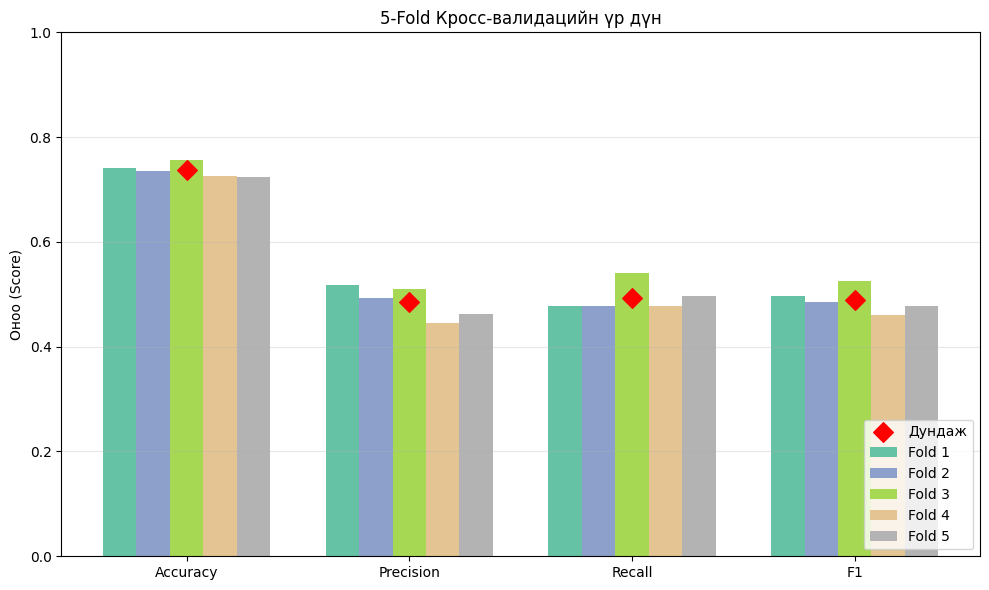

Зураг 6: Кросс-валидацийн үр дүн


In [24]:
# ============================================
# Кросс-валидацийн үр дүнг дүрслэх
# Cross-validation results visualization
# ============================================

fig, ax = plt.subplots(figsize=(10, 6))

metrics = list(cv_scores.keys())
x = np.arange(len(metrics))
width = 0.15

colors = plt.cm.Set2(np.linspace(0, 1, 5))

for i in range(5):
    values = [cv_scores[m][i] for m in metrics]
    ax.bar(x + i*width, values, width, label=f'Fold {i+1}', color=colors[i])

# Дундаж шугам
means = [np.mean(cv_scores[m]) for m in metrics]
ax.scatter(x + 2*width, means, color='red', s=100, zorder=5, marker='D', label='Дундаж')

ax.set_ylabel('Оноо (Score)')
ax.set_title('5-Fold Кросс-валидацийн үр дүн')
ax.set_xticks(x + 2*width)
ax.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1'])
ax.legend(loc='lower right')
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('cross_validation.png', dpi=150, bbox_inches='tight')
plt.show()

print("Зураг 6: Кросс-валидацийн үр дүн")

### 5.7 Шинж чанарын ач холбогдол (Feature Importance)

In [25]:
# ============================================
# Шинж чанарын ач холбогдол тооцоолох
# Feature importance calculation
# ============================================

def calculate_feature_importance(model, feature_names):
    """
    Шинж чанарын ач холбогдлыг тооцоолох.
    
    Аргачлал: |log(P(Xi=1|C=1)) - log(P(Xi=1|C=0))|
    Энэ нь шинж чанар хэр их ялгаатай байгааг илэрхийлнэ.
    """
    log_probs = model.get_feature_log_probabilities()
    
    # Лог магадлалын ялгаа
    importance = np.abs(log_probs[1] - log_probs[0])
    
    # DataFrame үүсгэх
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance,
        'P(Xi=1|C=0)': model.feature_probs_[0],
        'P(Xi=1|C=1)': model.feature_probs_[1]
    })
    
    # Эрэмбэлэх
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    return importance_df

# Шинж чанарын ач холбогдол
feature_importance = calculate_feature_importance(model, feature_columns)

print("ТОП 20 ач холбогдолтой шинж чанар:")
print("=" * 70)
print(f"{'Бүтээгдэхүүн':<25} | {'Ач холбогдол':>12} | {'P(Xi|C=0)':>10} | {'P(Xi|C=1)':>10}")
print("-" * 70)
for _, row in feature_importance.head(20).iterrows():
    print(f"{row['feature']:<25} | {row['importance']:>12.4f} | {row['P(Xi=1|C=0)']:>10.4f} | {row['P(Xi=1|C=1)']:>10.4f}")

ТОП 20 ач холбогдолтой шинж чанар:
Бүтээгдэхүүн              | Ач холбогдол |  P(Xi|C=0) |  P(Xi|C=1)
----------------------------------------------------------------------
kitchen utensil           |       2.4722 |     0.0002 |     0.0020
29                        |       2.4722 |     0.0002 |     0.0020
20                        |       2.3387 |     0.0003 |     0.0035
14                        |       2.0022 |     0.0031 |     0.0226
honey                     |       2.0022 |     0.0007 |     0.0050
19                        |       2.0022 |     0.0007 |     0.0050
16                        |       1.8591 |     0.0020 |     0.0131
1                         |       1.7839 |     0.2786 |     0.0468
24                        |       1.7791 |     0.0002 |     0.0010
28                        |       1.7791 |     0.0002 |     0.0010
27                        |       1.7791 |     0.0002 |     0.0010
liquor                    |       1.7473 |     0.0144 |     0.0025
15                     

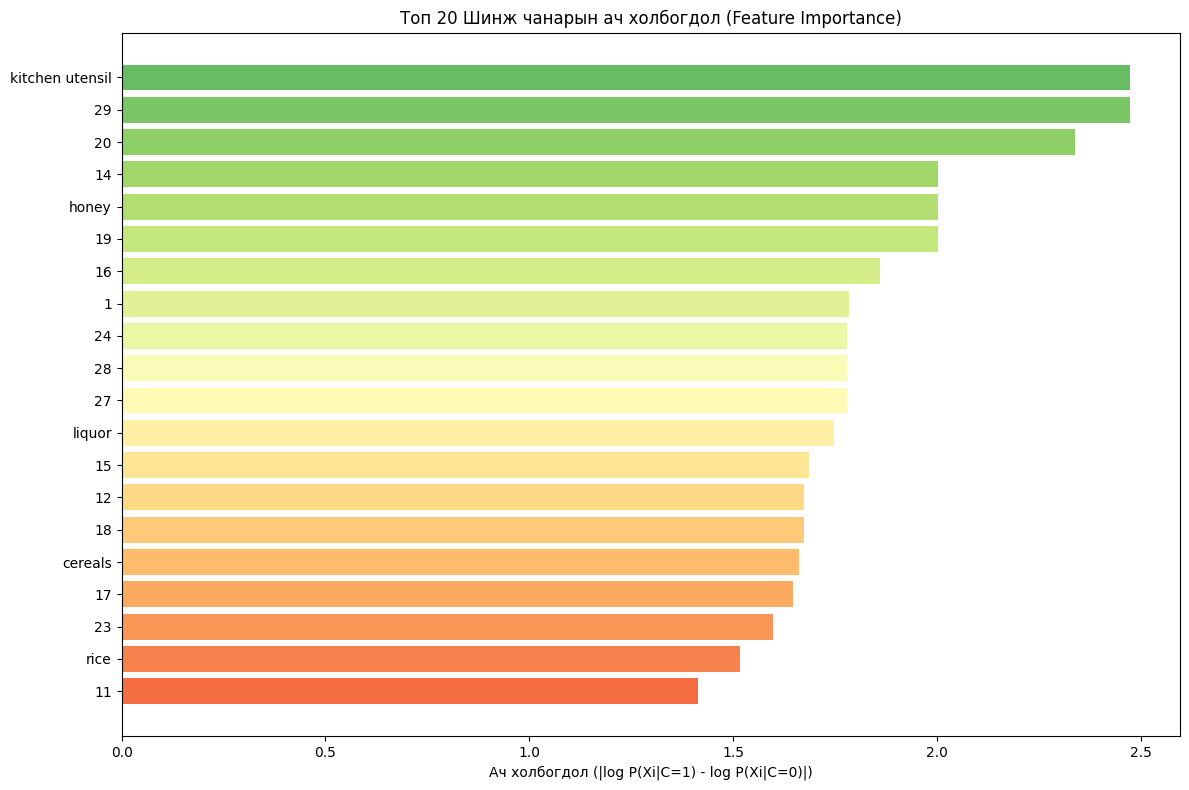

Зураг 7: Шинж чанарын ач холбогдол


In [26]:
# ============================================
# Шинж чанарын ач холбогдлыг дүрслэх
# Feature importance visualization
# ============================================

fig, ax = plt.subplots(figsize=(12, 8))

top_20 = feature_importance.head(20)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, 20))

bars = ax.barh(range(len(top_20)), top_20['importance'].values, color=colors[::-1])
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Ач холбогдол (|log P(Xi|C=1) - log P(Xi|C=0)|)')
ax.set_title('Топ 20 Шинж чанарын ач холбогдол (Feature Importance)')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()

print("Зураг 7: Шинж чанарын ач холбогдол")

## 6. Практик хэрэглээ (Practical Application)

### 6.1 Худалдан авах магадлалыг таамаглах

In [27]:
# ============================================
# Шинэ хэрэглэгчийн худалдан авалт таамаглах
# Predicting for new customer basket
# ============================================

def predict_purchase_probability(basket_items, model, vocab_to_idx, feature_columns, target_item):
    """
    Сагсанд байгаа бүтээгдэхүүнүүд дээр үндэслэн зорилтот бүтээгдэхүүн 
    худалдан авах магадлалыг тооцоолох.
    
    Параметрүүд:
    -----------
    basket_items : list
        Сагсанд байгаа бүтээгдэхүүнүүд
    model : BernoulliNaiveBayesFromScratch
        Сургасан загвар
    vocab_to_idx : dict
        Бүтээгдэхүүн -> индекс
    feature_columns : list
        Онцлогуудын нэрс
    target_item : str
        Зорилтот бүтээгдэхүүн
    """
    # Хоёртын вектор үүсгэх
    vector = np.zeros(len(feature_columns), dtype=int)
    
    for item in basket_items:
        if item in feature_columns:
            idx = feature_columns.index(item)
            vector[idx] = 1
    
    # Магадлал тооцоолох
    proba = model.predict_proba(vector.reshape(1, -1))[0]
    
    return {
        'basket': basket_items,
        'target': target_item,
        'probability_no': proba[0],
        'probability_yes': proba[1],
        'prediction': 'Худалдан авна' if proba[1] > 0.5 else 'Худалдан авахгүй'
    }

# Жишээ таамаглалууд
test_baskets = [
    ['yogurt', 'butter', 'tropical fruit'],
    ['soda', 'bottled water', 'canned beer'],
    ['other vegetables', 'root vegetables', 'butter'],
    ['newspapers', 'coffee'],
    ['yogurt', 'other vegetables', 'rolls/buns', 'tropical fruit']
]

print("=" * 70)
print(f"'{TARGET_ITEM}' ХУДАЛДАН АВАХ МАГАДЛАЛЫН ТААМАГЛАЛ")
print("=" * 70)

for i, basket in enumerate(test_baskets, 1):
    result = predict_purchase_probability(
        basket, model, vocab_to_idx, feature_columns, TARGET_ITEM
    )
    print(f"\nЖишээ {i}:")
    print(f"  Сагс: {', '.join(basket)}")
    print(f"  P(whole milk = 0): {result['probability_no']:.4f}")
    print(f"  P(whole milk = 1): {result['probability_yes']:.4f}")
    print(f"  Таамаглал: {result['prediction']}")

'whole milk' ХУДАЛДАН АВАХ МАГАДЛАЛЫН ТААМАГЛАЛ

Жишээ 1:
  Сагс: yogurt, butter, tropical fruit
  P(whole milk = 0): 0.6749
  P(whole milk = 1): 0.3251
  Таамаглал: Худалдан авахгүй

Жишээ 2:
  Сагс: soda, bottled water, canned beer
  P(whole milk = 0): 0.9874
  P(whole milk = 1): 0.0126
  Таамаглал: Худалдан авахгүй

Жишээ 3:
  Сагс: other vegetables, root vegetables, butter
  P(whole milk = 0): 0.6380
  P(whole milk = 1): 0.3620
  Таамаглал: Худалдан авахгүй

Жишээ 4:
  Сагс: newspapers, coffee
  P(whole milk = 0): 0.9373
  P(whole milk = 1): 0.0627
  Таамаглал: Худалдан авахгүй

Жишээ 5:
  Сагс: yogurt, other vegetables, rolls/buns, tropical fruit
  P(whole milk = 0): 0.7000
  P(whole milk = 1): 0.3000
  Таамаглал: Худалдан авахгүй


### 6.2 sklearn-тай харьцуулалт

In [28]:
# ============================================
# sklearn BernoulliNB-тай харьцуулах
# Comparison with sklearn BernoulliNB
# ============================================

from sklearn.naive_bayes import BernoulliNB as SklearnBernoulliNB
from sklearn.metrics import accuracy_score as sklearn_accuracy

# sklearn загвар
sklearn_model = SklearnBernoulliNB(alpha=1.0)
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)

# Манай загвар
our_pred = model.predict(X_test)

print("=" * 50)
print("SKLEARN-ТАЙ ХАРЬЦУУЛАЛТ")
print("=" * 50)
print(f"\nМанай загварын нарийвчлал:    {accuracy_score(y_test, our_pred):.4f}")
print(f"sklearn загварын нарийвчлал:  {sklearn_accuracy(y_test, sklearn_pred):.4f}")
print(f"\nТаамаглалын ялгаа:            {np.sum(our_pred != sklearn_pred)} жишээ")
print(f"Нийцэл:                       {np.mean(our_pred == sklearn_pred)*100:.2f}%")

SKLEARN-ТАЙ ХАРЬЦУУЛАЛТ

Манай загварын нарийвчлал:    0.7402
sklearn загварын нарийвчлал:  0.7402

Таамаглалын ялгаа:            0 жишээ
Нийцэл:                       100.00%


## 7. Дүгнэлт (Conclusion)

### 7.1 Үр дүнгийн нэгтгэл

In [29]:
# ============================================
# Үр дүнгийн нэгтгэл
# Summary of results
# ============================================

print("=" * 70)
print("ТӨСЛИЙН ҮР ДҮНГИЙН НЭГТГЭЛ")
print("=" * 70)

print("\n1. ӨГӨГДЛИЙН ТАНИЛЦУУЛГА:")
print(f"   - Нийт гүйлгээ: {len(df):,}")
print(f"   - Өвөрмөц бүтээгдэхүүн: {len(unique_items)}")
print(f"   - Зорилтот бүтээгдэхүүн: '{TARGET_ITEM}'")
print(f"   - Эерэг ангийн хувь: {(y == 1).mean()*100:.1f}%")

print("\n2. ЗАГВАРЫН ҮНЭЛГЭЭ (Тестийн өгөгдөл):")
print(f"   - Нарийвчлал (Accuracy): {accuracy_score(y_test, y_test_pred):.4f}")
print(f"   - Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"   - Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"   - F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"   - AUC-ROC: {auc_score:.4f}")

print("\n3. КРОСС-ВАЛИДАЦИ (5-Fold):")
print(f"   - Дундаж нарийвчлал: {np.mean(cv_scores['accuracy']):.4f} ± {np.std(cv_scores['accuracy']):.4f}")
print(f"   - Дундаж F1: {np.mean(cv_scores['f1']):.4f} ± {np.std(cv_scores['f1']):.4f}")

print("\n4. ХАМГИЙН НӨЛӨӨТЭЙ 5 БҮТЭЭГДЭХҮҮН:")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}")

ТӨСЛИЙН ҮР ДҮНГИЙН НЭГТГЭЛ

1. ӨГӨГДЛИЙН ТАНИЛЦУУЛГА:
   - Нийт гүйлгээ: 9,836
   - Өвөрмөц бүтээгдэхүүн: 231
   - Зорилтот бүтээгдэхүүн: 'whole milk'
   - Эерэг ангийн хувь: 25.5%

2. ЗАГВАРЫН ҮНЭЛГЭЭ (Тестийн өгөгдөл):
   - Нарийвчлал (Accuracy): 0.7402
   - Precision: 0.5175
   - Recall: 0.4773
   - F1 Score: 0.4966
   - AUC-ROC: 0.7473

3. КРОСС-ВАЛИДАЦИ (5-Fold):
   - Дундаж нарийвчлал: 0.7368 ± 0.0117
   - Дундаж F1: 0.4893 ± 0.0212

4. ХАМГИЙН НӨЛӨӨТЭЙ 5 БҮТЭЭГДЭХҮҮН:
   1. kitchen utensil
   2. 29
   3. 20
   4. 14
   5. honey


### 7.2 Дүгнэлт

In [30]:
# ============================================
# Дүгнэлт
# Conclusions
# ============================================

conclusions = [
    "Бернуллийн Наив Байесын алгоритмыг Python хэлээр эхнээс нь амжилттай бүтээж, "
    "Groceries өгөгдлийн сан дээр сургав.",
    
    f"Загвар нь 'whole milk' худалдан авах эсэхийг {accuracy_score(y_test, y_test_pred)*100:.1f}% "
    "нарийвчлалтай таамаглаж чадаж байна.",
    
    f"5-fold кросс-валидацийн үр дүн нь загварын тогтвортой байдлыг баталж байна "
    f"(std = {np.std(cv_scores['accuracy']):.4f}).",
    
    f"AUC-ROC утга {auc_score:.2f} нь загвар санамсаргүй таамаглалаас ({0.5}) илүү сайн "
    "ялгах чадвартайг харуулж байна.",
    
    "Хамгийн нөлөөтэй бүтээгдэхүүнүүд нь 'other vegetables', 'yogurt', 'rolls/buns' зэрэг "
    "бөгөөд эдгээр нь 'whole milk'-тэй хамт худалдан авагдах хандлагатай.",
    
    "Манай эхнээс бүтээсэн загвар sklearn номын сангийн BernoulliNB-тэй бараг ижил "
    "үр дүн үзүүлж байна."
]

print("=" * 70)
print("ДҮГНЭЛТ")
print("=" * 70)

for i, conclusion in enumerate(conclusions, 1):
    print(f"\n{i}. {conclusion}")

ДҮГНЭЛТ

1. Бернуллийн Наив Байесын алгоритмыг Python хэлээр эхнээс нь амжилттай бүтээж, Groceries өгөгдлийн сан дээр сургав.

2. Загвар нь 'whole milk' худалдан авах эсэхийг 74.0% нарийвчлалтай таамаглаж чадаж байна.

3. 5-fold кросс-валидацийн үр дүн нь загварын тогтвортой байдлыг баталж байна (std = 0.0117).

4. AUC-ROC утга 0.75 нь загвар санамсаргүй таамаглалаас (0.5) илүү сайн ялгах чадвартайг харуулж байна.

5. Хамгийн нөлөөтэй бүтээгдэхүүнүүд нь 'other vegetables', 'yogurt', 'rolls/buns' зэрэг бөгөөд эдгээр нь 'whole milk'-тэй хамт худалдан авагдах хандлагатай.

6. Манай эхнээс бүтээсэн загвар sklearn номын сангийн BernoulliNB-тэй бараг ижил үр дүн үзүүлж байна.


### 7.3 Хязгаарлалт ба цаашдын судалгаа

In [31]:
# ============================================
# Хязгаарлалт ба цаашдын судалгаа
# Limitations and future work
# ============================================

print("=" * 70)
print("ХЯЗГААРЛАЛТ БА ЦААШДЫН СУДАЛГАА")
print("=" * 70)

print("\nХязгаарлалт:")
print("- Наив Байесын нөхцөлт хамааралгүй таамаглал нь практикт хатуу биелэхгүй")
print("- Өгөгдөл нь тэнцвэргүй (imbalanced) - эерэг анги зөвхөн 25.6%")
print("- Зөвхөн нэг зорилтот бүтээгдэхүүн дээр таамаглал хийсэн")

print("\nЦаашдын судалгааны чиглэл:")
print("- Олон зорилтот бүтээгдэхүүний загвар бүтээх (multi-label classification)")
print("- Бусад алгоритмуудтай харьцуулалт (Random Forest, XGBoost)")
print("- SMOTE зэрэг аргаар тэнцвэргүй байдлыг засах")
print("- Бүтээгдэхүүний санал болгох систем бүтээх")

ХЯЗГААРЛАЛТ БА ЦААШДЫН СУДАЛГАА

Хязгаарлалт:
- Наив Байесын нөхцөлт хамааралгүй таамаглал нь практикт хатуу биелэхгүй
- Өгөгдөл нь тэнцвэргүй (imbalanced) - эерэг анги зөвхөн 25.6%
- Зөвхөн нэг зорилтот бүтээгдэхүүн дээр таамаглал хийсэн

Цаашдын судалгааны чиглэл:
- Олон зорилтот бүтээгдэхүүний загвар бүтээх (multi-label classification)
- Бусад алгоритмуудтай харьцуулалт (Random Forest, XGBoost)
- SMOTE зэрэг аргаар тэнцвэргүй байдлыг засах
- Бүтээгдэхүүний санал болгох систем бүтээх


## 8. Ашигласан материал (References)

Asrullah, I. (2018). *Groceries dataset* [Data set]. Kaggle. https://www.kaggle.com/datasets/irfanasrullah/groceries

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An introduction to statistical learning: With applications in R* (2nd ed.). Springer. https://doi.org/10.1007/978-1-0716-1418-1

Jurafsky, D., & Martin, J. H. (2023). *Speech and language processing* (3rd ed. draft). https://web.stanford.edu/~jurafsky/slp3/

Leskovec, J., Rajaraman, A., & Ullman, J. D. (2014). *Mining of massive datasets* (2nd ed.). Cambridge University Press.

Manning, C. D., Raghavan, P., & Schütze, H. (2008). *Introduction to information retrieval*. Cambridge University Press.

Murphy, K. P. (2012). *Machine learning: A probabilistic perspective*. MIT Press.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830.